In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print("X shape:", X.shape, ", y shape:", y.shape)

X shape: (70000, 784) , y shape: (70000,)


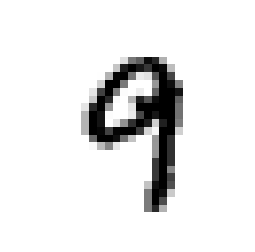

In [3]:
test_digit = X[55555]
test_digit_image = test_digit.reshape(28,28)

plt.imshow(test_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
y[55555]

9.0

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [8]:
sgd_clf.predict([test_digit])

array([ 9.])

In [9]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_sgd)

array([[5418,    2,   66,   28,   18,   67,   90,   12,  202,   20],
       [   1, 6258,   50,   31,    7,   46,   46,   17,  267,   19],
       [  26,   53, 5107,  159,   56,   24,  121,   86,  292,   34],
       [  13,   19,  175, 5125,   16,  258,   35,   60,  338,   92],
       [  14,   21,   79,   17, 4952,   11,   71,   63,  220,  394],
       [  71,   29,   64,  238,   83, 3775,  192,   30,  837,  102],
       [  21,    6,   60,    5,   19,   35, 5636,   17,  115,    4],
       [  20,   12,   55,   52,   55,   11,    7, 5639,   58,  356],
       [  29,  109,   70,  109,   40,  163,   88,   46, 5105,   92],
       [  19,   17,   37,   75,  137,   35,    5,  287,  268, 5069]])

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

def precision_recall(train, prediction):
    p = precision_score(train, prediction, average='weighted')
    r = recall_score(train, prediction, average='weighted')
    f = f1_score(train, prediction, average='weighted')
    print("Precision", p)
    print("Recall:", r)
    print("F1 Score:", f)

In [12]:
%%time
from sklearn.model_selection import cross_val_score

y_scores_sgd = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 7.08 s, sys: 346 ms, total: 7.42 s
Wall time: 7.09 s


In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
y_scores_forest = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 12 s, sys: 420 ms, total: 12.4 s
Wall time: 3.14 s


In [37]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
y_scores_knn = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 1h 19min 46s, sys: 11.2 s, total: 1h 19min 57s
Wall time: 11min 1s


In [38]:
%%time
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier(hidden_layer_sizes=(784,784,784), random_state=42)
y_scores_MLP = cross_val_score(MLP_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 18min 35s, sys: 1min 42s, total: 20min 17s
Wall time: 6min 8s


In [39]:
print("SGD:", y_scores_sgd)
print("Random Forest:", y_scores_forest)
print("KNN:", y_scores_knn)
print("MLP:", y_scores_MLP)

SGD: [ 0.87432513  0.87319366  0.8566785 ]
Random Forest: [ 0.9415117   0.93974699  0.94099115]
KNN: [ 0.96795641  0.96819841  0.96819523]
MLP: [ 0.95855829  0.95724786  0.95034255]


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[180,200,220,240], 'max_features':[20,30,35]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
             ]
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_features': [20, 30, 35], 'n_estimators': [180, 200, 220, 240]}, {'max_features': [2, 3, 4], 'bootstrap': [False], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9664 {'max_features': 20, 'n_estimators': 180}
0.966216666667 {'max_features': 20, 'n_estimators': 200}
0.966366666667 {'max_features': 20, 'n_estimators': 220}
0.9667 {'max_features': 20, 'n_estimators': 240}
0.9662 {'max_features': 30, 'n_estimators': 180}
0.96645 {'max_features': 30, 'n_estimators': 200}
0.966983333333 {'max_features': 30, 'n_estimators': 220}
0.966783333333 {'max_features': 30, 'n_estimators': 240}
0.966333333333 {'max_features': 35, 'n_estimators': 180}
0.966483333333 {'max_features': 35, 'n_estimators': 200}
0.966866666667 {'max_features': 35, 'n_estimators': 220}
0.966983333333 {'max_features': 35, 'n_estimators': 240}
0.7984 {'max_features': 2, 'bootstrap': False, 'n_estimators': 3}
0.91745 {'max_features': 2, 'bootstrap': False, 'n_estimators': 10}
0.812733333333 {'max_features': 3, 'bootstrap': False, 'n_estimators': 3}
0.923466666667 {'max_features': 3, 'bootstrap': False, 'n_estimators': 10}
0.820316666667 {'max_features': 4, 'bootstrap': False, 'n_estima

In [30]:
param_grid = [{'n_neighbors':[5,15,30], 'weights':['uniform', 'distance']},
              
             ]
grid_search_knn = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 15, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [31]:
cvres_knn = grid_search_knn.cv_results_
for mean_score, params in zip(cvres_knn["mean_test_score"], cvres_knn["params"]):
    print(mean_score, params)

0.968116666667 {'weights': 'uniform', 'n_neighbors': 5}
0.96975 {'weights': 'distance', 'n_neighbors': 5}
0.961 {'weights': 'uniform', 'n_neighbors': 15}
0.962283333333 {'weights': 'distance', 'n_neighbors': 15}
0.952533333333 {'weights': 'uniform', 'n_neighbors': 30}
0.954266666667 {'weights': 'distance', 'n_neighbors': 30}


In [32]:
grid_search_knn.best_score_

0.96975

In [33]:
param_grid = [{'n_neighbors':[3,5,8], 'weights':['distance']},
             ]
grid_search_knn2 = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')
grid_search_knn2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [3, 5, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [34]:
cvres_knn2 = grid_search_knn2.cv_results_
for mean_score, params in zip(cvres_knn2["mean_test_score"], cvres_knn2["params"]):
    print(mean_score, params)

0.970166666667 {'weights': 'distance', 'n_neighbors': 3}
0.96975 {'weights': 'distance', 'n_neighbors': 5}
0.9685 {'weights': 'distance', 'n_neighbors': 8}


In [36]:
grid_search_knn2.best_score_

0.97016666666666662

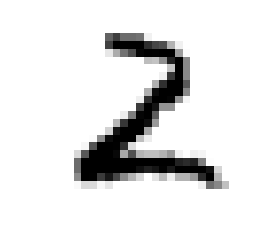

In [51]:
test_digit2 = X_test[2230]
test_digit_image2 = test_digit2.reshape(28,28)

plt.imshow(test_digit_image2, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [67]:
final_model = grid_search_knn2.best_estimator_

def read_numbers(indexes):
    for x in indexes:
        print("Prediction:", final_model.predict(X_test[x].reshape(1,-1)), "Correct Answer:", y_test[x])

In [72]:
import random

numbers = random.sample(range(0,10000),10)

read_numbers(numbers)

Prediction: [ 7.] Correct Answer: 7.0
Prediction: [ 3.] Correct Answer: 3.0
Prediction: [ 3.] Correct Answer: 3.0
Prediction: [ 7.] Correct Answer: 7.0
Prediction: [ 2.] Correct Answer: 2.0
Prediction: [ 5.] Correct Answer: 5.0
Prediction: [ 7.] Correct Answer: 7.0
Prediction: [ 2.] Correct Answer: 2.0
Prediction: [ 8.] Correct Answer: 8.0
Prediction: [ 3.] Correct Answer: 3.0
